In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
from time import sleep
import scipy
import operator
import difflib
from IPython.core.display import display,HTML
try:
    import cPickle as pickle     #it is faster than pickle!
except:
    import pickle
    
import unicodedata

import seaborn as sns   ### https://seaborn.pydata.org/tutorial/categorical.html
    
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser

In [2]:
path="/home/juliaponcela/at_NICO/Dropbox_collaboration_patterns/Data/Dropbox/"
df = pd.read_excel(open(path+'Combined_NICO_file1_2_wos.xlsx','rb'),na_values=["NAN","-1"])



In [3]:
print df.shape    #(57740, 11)
for c in df.columns:
        print c

# id
# Field
# ranking30_University
# total_publications
# num_papers_last_author
# num_citations
# quota_bytes
# is_pro_user
# is_business_user
# num_internal_collaborators
# num_external_collaborators
    


(57740, 11)
id
Field
ranking30_University
total_publications
num_papers_last_author
num_citations
quota_bytes
is_pro_user
is_business_user
num_internal_collaborators
num_external_collaborators


In [4]:
df.head(3)

,id,Field,ranking30_University,total_publications,num_papers_last_author,num_citations,quota_bytes,is_pro_user,is_business_user,num_internal_collaborators,num_external_collaborators
0,1,science,1-30,1.0-2.0,0.0-1.0,1.0-30.0,40417909260,0.0,1,5,13
1,2,medicine dentistry nursing pharmacology,1-30,56.0-1350.0,18.0-1216.0,1183.0-146545.0,198671153541,1.0,0,21,116
2,3,science,1-30,NaN,NaN,NaN,6315782050,0.0,0,6,31


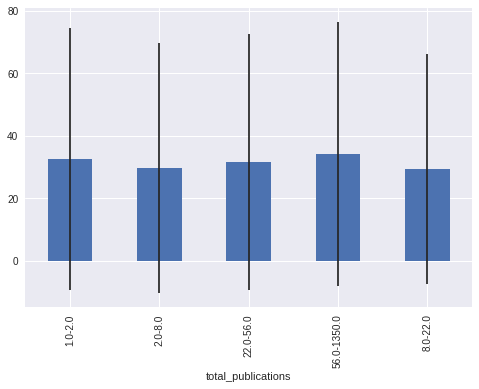

In [5]:
# instead of using matplotlib:
#df.plot.scatter(x="id", y='total_publications', alpha=0.1)
#df.groupby('ranking30_University').num_external_collaborators.mean().plot(kind='bar')
std = df.groupby('total_publications').num_external_collaborators.std()
df.groupby('total_publications').num_external_collaborators.mean().plot(kind='bar',yerr=std)


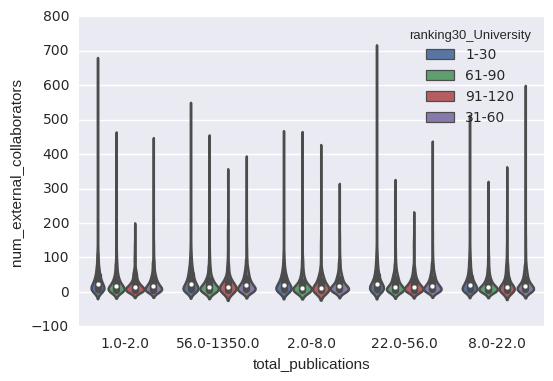

In [98]:
#use seaborn instead
# https://seaborn.pydata.org/tutorial/categorical.html

#sns.barplot(x="total_publications", y="num_external_collaborators", hue='is_business_user',data=df);
#sns.boxplot(x="total_publications", y="num_external_collaborators", data=df);
sns.violinplot(x="total_publications", y="num_external_collaborators", hue='ranking30_University', data=df);

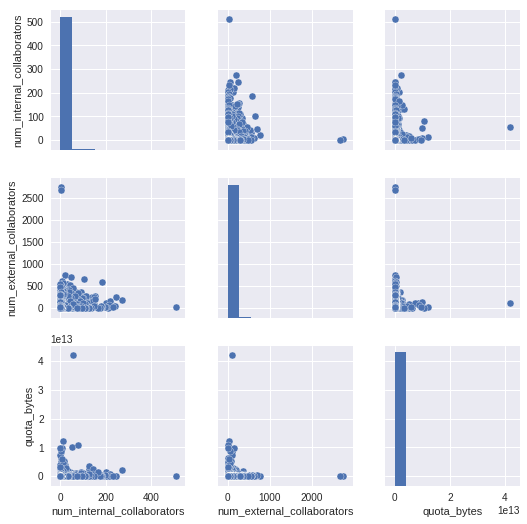

In [6]:
sns.pairplot(df[['num_internal_collaborators','num_external_collaborators','quota_bytes']])  # pairwise scatter plots and distribution for each variable in the diagonal positions

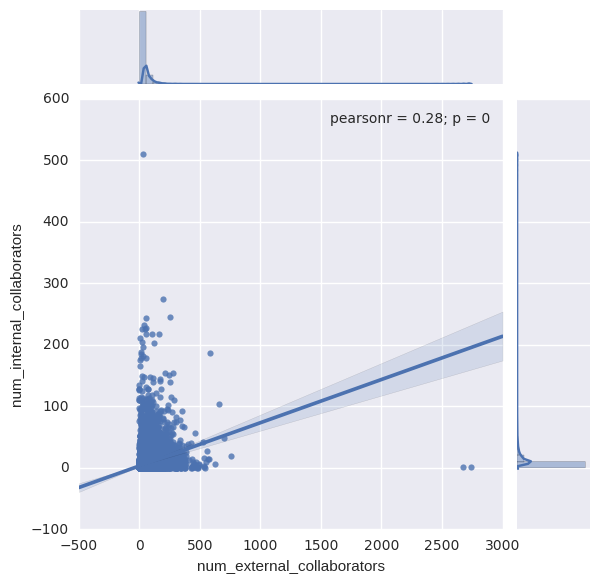

In [79]:
sns.jointplot(x="num_external_collaborators", y="num_internal_collaborators", data=df, kind="reg")



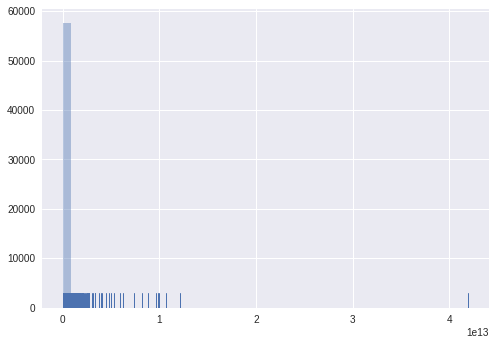

In [8]:
lista=list(df[["quota_bytes"]].values.flatten())

sns.distplot(lista, kde=False, rug=True)